In [9]:
#导入包
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import mpl_toolkits.axisartist as axisartist
import math 
import matplotlib as mpl 
import networkx as nx
from scipy import integrate

E:\Anaconda\lib\site-packages\openpyxl\styles\stylesheet.py:214: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


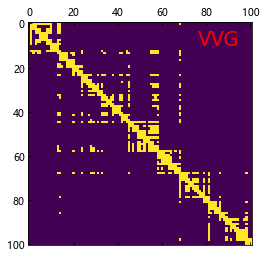

In [10]:
#手动输入Q的长度,根据excel读取连接两点,绘制邻接矩阵
def matrix_z():
    #输入Q的长度
    len_Q=100
    #读取excel连接两点数据
    df1=pd.read_excel('mydata.xlsx')
    arr=np.array([df1['a'],df1['b']])-1
    x=np.array(range(0,len_Q))
    G = nx.DiGraph()# 无多重边无向图
    #点
    G.add_nodes_from(x)  # 添加多个节点
    #边，将相连的两放进去
    for i in range(0,len(arr[0])):
        G.add_edges_from([(arr[0][i]+1,arr[1][i]+1)])
    #边，节点自连接
    for i in range(0,len_Q):
        G.add_edges_from([(i+1,i+1)])
    
    # 画图的邻接矩阵
    matrix_arr=np.array(nx.adjacency_matrix(G).todense())
    #matrix_arr=nx.adjacency_matrix(G).todense()
    colors = ['while','yellow'] 
    cmap = mpl.colors.ListedColormap(colors)
    plt.matshow(np.transpose(matrix_arr))
    
    #图的一些设置
    #plt.xlabel('N',fontsize=20)
    #plt.ylabel('N',fontsize=20)
    plt.title('VVG',fontsize=20,y=0.87,x=0.85,color='red')
    
    #保存图片
    #plt.savefig('VVG_Ecoli_100.png',dpi=600)
    
    #plt.show()
    
    #return p1

#调用函数
matrix_z()

In [11]:
#计算有向度分布图的横纵坐标
def getXY2(arr,len_Q):
    x=np.array(range(0,len_Q))
    G = nx.DiGraph()# 无多重边有向图
    G.clear()
    #点
    G.add_nodes_from(x)
    #边，将相连的两放进去
    for i in range(0,len(arr[0])):
        G.add_edges_from([(arr[0][i],arr[1][i])])    
    #画度分布图
    #得到不同度的个数
    
    #入度
    indexs=pd.DataFrame(G.in_degree).iloc[:,1].value_counts().index
    values=pd.DataFrame(G.in_degree).iloc[:,1].value_counts().values
    indegree = [0 for _ in range(max(indexs)+1)]
    v=0
    for i in indexs:
        indegree[i]=values[v]
        v=v+1
    #生成X轴序列，从1到最大度
    xin=range(0,len(indegree))
    #将频次转化为频率，利用列表内涵
    yin=[z/float(sum(indegree))for z in indegree]
    
    #出度
    indexs=pd.DataFrame(G.out_degree).iloc[:,1].value_counts().index
    values=pd.DataFrame(G.out_degree).iloc[:,1].value_counts().values
    outdegree = [0 for _ in range(max(indexs)+1)]
    v=0
    for i in indexs:
        outdegree[i]=values[v]
        v=v+1
    #生成X轴序列，从1到最大度
    xout=range(0,len(outdegree))
    #将频次转化为频率，利用列表内涵
    yout=[z/float(sum(outdegree))for z in outdegree]
    
    return np.array([[xin,yin],[xout,yout]])


E:\Anaconda\lib\site-packages\openpyxl\styles\stylesheet.py:214: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


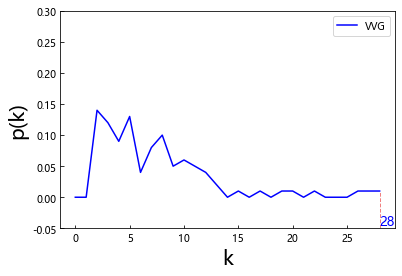

In [12]:
#入度度分布图
def degree_plot():
    # 这两行代码解决 plt 中文显示的问题
    plt.rcParams['font.sans-serif'] = ['Microsoft YaHei'] 
    plt.rcParams['axes.unicode_minus'] = False
    plt.ylim(-0.05,0.3)
    #plt.xlim(1e0,1e2)
    #plt.xscale('log')
    #plt.yscale('log')
    
    #数据
    df1=pd.read_excel('mydata.xlsx')
    arrVVG=np.array([df1['a'],df1['b']])-1
        
    #画图(入度)
    plt.plot(getXY2(arrVVG,100)[0][0],getXY2(arrVVG,100)[0][1],color="blue",label='VVG')
    length=len(getXY2(arrVVG,100)[0][0])
    lastx=getXY2(arrVVG,100)[0][0][length-1]
    lasty2=getXY2(arrVVG,100)[0][1][length-1]
    plt.vlines(lastx, -0.05, lasty2, linestyles='dashed', colors='lightcoral', linewidth=1)
    plt.text(lastx,-0.045,int(lastx),fontdict={'size':'13','color':'b'})
    
    #图的一些设置
    #plt.title('长度为300的随机序列',y=1.03)
    plt.xlabel('k',fontsize=20)
    plt.ylabel('p(k)',fontsize=20)
    plt.legend()# 显示图例，即每条线对应 label 中的内容
    
    #保存图片
    #plt.savefig('VVG度分布图(入度)_Ecoli100.png',dpi=600)
    
    #显示图表
    plt.show()
    
degree_plot()

E:\Anaconda\lib\site-packages\openpyxl\styles\stylesheet.py:214: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


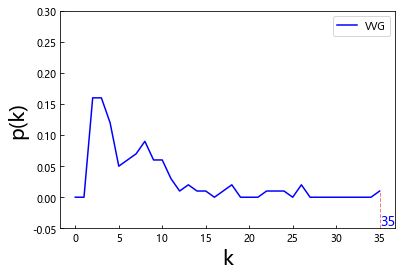

In [13]:
#出度度分布图
def degree_plot():
    # 这两行代码解决 plt 中文显示的问题
    plt.rcParams['font.sans-serif'] = ['Microsoft YaHei'] 
    plt.rcParams['axes.unicode_minus'] = False
    plt.ylim(-0.05,0.3)
    #plt.xlim(1e0,1e2)
    #plt.xscale('log')
    #plt.yscale('log')
    
    #数据
    df1=pd.read_excel('mydata.xlsx')
    arrVVG=np.array([df1['a'],df1['b']])-1
        
    #画图(出度)
    plt.plot(getXY2(arrVVG,100)[1][0],getXY2(arrVVG,100)[1][1],color="blue",label='VVG')
    length=len(getXY2(arrVVG,100)[1][0])
    lastx=getXY2(arrVVG,100)[1][0][length-1]
    lasty2=getXY2(arrVVG,100)[1][1][length-1]
    plt.vlines(lastx, -0.05, lasty2, linestyles='dashed', colors='lightcoral', linewidth=1)
    plt.text(lastx,-0.045,int(lastx),fontdict={'size':'13','color':'b'})
    
    #图的一些设置
    #plt.title('长度为300的随机序列',y=1.03)
    plt.xlabel('k',fontsize=20)
    plt.ylabel('p(k)',fontsize=20)
    plt.legend()# 显示图例，即每条线对应 label 中的内容
    
    #保存图片
    #plt.savefig('VVG度分布图(出度)_Ecoli100.png',dpi=600)
    
    #显示图表
    plt.show()
    
degree_plot()